# Takeoff Condition

This section computes parameters related to HL devices for the example aiplane in takeoff conditions. The drag polar in takeoff condition is also plotted, and the maximum $L/D$ is also determined. Based on constraint analysis, the $C_{L_{max_{TO}}}$ is 1.8 for the example airplane, respectively. Note that $C_{L_{max}}$ is 1.44 which is computed in aerodynamics section. Using these values and the process outlined earlier, below code block computes various parameters related to HL devices for takeoff conditions.

In [61]:
# Variables
CLmax = 1.44
CLmaxTO = 1.8
Sf = 58.1 # sq ft
Sref = 134 # sq ft
K = 0.93 # from figure 7.4, Roskam Part 2
cf_c = 0.25
delta_alpha_Clzero = -10 # deg, assumed from Raymer
Clalpha = 0.116 # 1/deg for NACA 23018
alpha_CLzero = -1 # from aerodynamics section

# Requried change in Cl
delta_CLmax = 1.05*(CLmaxTO - CLmax)
delta_Clmax = delta_CLmax * Sref / Sf
delta_Cl = delta_Clmax / K

print(f"Required change in airfoil sectional Cl: {delta_Cl:.2f}")

# Computed change in Cl
# Change the value of delta_f and alpha_delta_f until computed value is same as required
delta_f = 16 # deg
alpha_delta_f = 0.5 # fromdelta_f value and figure 7.8, Roskam Part 2
delta_Cl_comp = Clalpha * alpha_delta_f * delta_f

print(f"Computed change in airfoil sectional Cl for flap deflection of {delta_f} deg: {delta_Cl_comp:.2f}")

# change zero lift angle
delta_alpha_CLzero = delta_alpha_Clzero * Sf / Sref

# zero lift angle with TO flaps
alpha_flap_CLzero = alpha_CLzero + delta_alpha_CLzero

print(f"Zero-lift angle of attack with TO flaps: {alpha_flap_CLzero:.1f}  deg")

Required change in airfoil sectional Cl: 0.94
Computed change in airfoil sectional Cl for flap deflection of 16 deg: 0.93
Zero-lift angle of attack with TO flaps: -5.3  deg


Based on above calculation, it is determined that flap deflection of 16 degrees is enough to achieve the maximum $C_L$ of 1.8 at takeoff conditions. Below code block plots the lift curve in takeoff conditions.

> __*NOTE*:__ The sinlge slotted flap used for example airplane does not change the lift curve slope, while having approximating same $\alpha$ for maixmum $C_L$.

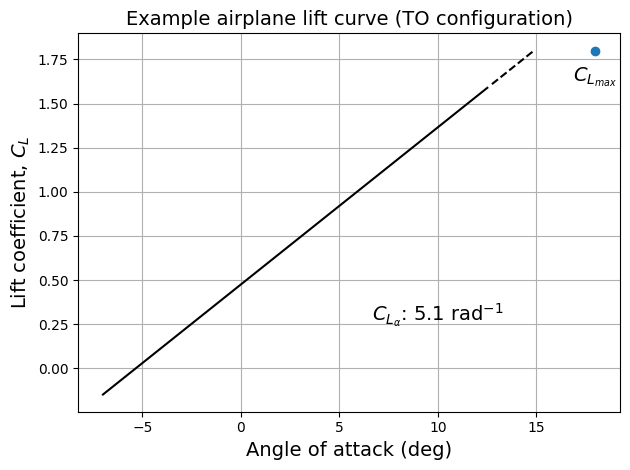

In [62]:
# Lift curve
import numpy as np
import matplotlib.pyplot as plt

fs = 14 # fontsize
alpha = np.linspace(-7,16,100) * np.pi/180 # alpha values, rad
CLalpha = 5.1
CLmaxTO = 1.8

CL = CLalpha * (alpha - alpha_flap_CLzero * np.pi/180)

# Splitting data based on linear and nonlinear region
CL_linear = CL[CL<=1.6]
alpha_linear = alpha[CL<=1.6]

CL_nonlinear = CL[np.logical_and(CL>1.6,CL<CLmaxTO)]
alpha_nonlinear = alpha[np.logical_and(CL>1.6,CL<CLmaxTO)]

fig, ax = plt.subplots()
ax.plot(alpha_linear*180/np.pi, CL_linear, "k-")
ax.plot(alpha_nonlinear*180/np.pi, CL_nonlinear, "k--")
ax.scatter(18, CLmaxTO)
ax.set_xlabel("Angle of attack (deg)", fontsize=fs)
ax.set_ylabel("Lift coefficient, $C_L$", fontsize=fs)
ax.set_title("Example airplane lift curve (TO configuration)", fontsize=fs)
ax.annotate(r"$C_{L_\alpha}$: " + f"{CLalpha:.2} " + r"$\text{rad}^{-1}$", (10,0.3), fontsize=fs, ha="center", va="center")
ax.annotate("$C_{L_{max}}$", (18,CLmaxTO-0.15), fontsize=fs, ha="center", va="center")
ax.grid()
plt.tight_layout()


## Takeoff Drag Polar

Once lift curve is obtained for the takeoff flap settings, one can plot the drag polar as well. As discussed in aerodynamics section, a simple drag model. With flaps deployed, one has to compute its effect